## MATEMÁTICAS DISCRETAS: Teoría de Grafos

## Notebook 2: Minimum Spanning trees

1. Determinar el arbol minimo generador (Minimum Spanning Tree - usar de referencia el archivo adjunto).

### Librerias

**math :** Calcular la distancia entre los nodos y realizar otras operaciones aritmeticas.

**matplotlib** y **networkx :** Representar el grafo y arbol de expasión.

In [1]:
import math
import matplotlib.pyplot as plt
import networkx as nx

## Clases

Usaremos la clase Nodo para almacenar el nombre del vertice y su posicion en el plano cartesiano XY

In [2]:
class Nodo:
    def __init__(self,nombre,x,y):
        self.nombre = nombre
        self.x = x
        self.y = y
        self.adyacentes = []

## Funciones

**calcularPeso :** Usaremos esta funcón para calcular el peso de las aristas

In [3]:
def calcularPeso(nodoA, nodoB):
    deltaX = (nodoA.x - nodoB.x)*100
    deltaY = (nodoA.y - nodoB.y)*100
    distancia = math.sqrt(  pow(deltaX,2) + pow(deltaY,2)  )
    return distancia

**actualizar :** Usaremos esta función para actualizar la cola de priorida con la nueva distancia de un nodo especifico

In [4]:
def actualizar(matriz,pNodo,distancia):
    pNodos = matriz[0]
    distancias = matriz[1]
    for i in range(len(pNodos)):
        temp = pNodos[i]
        if temp == pNodo:
            distancias[i] = distancia    

## Estructuras de datos iniciales

In [5]:
# Declaracion de la matriz vertices en donde se encuentran la posiciones de nuestro nodos  
vertices = [         
    ["A", 2,  1 ],
    ["B", 19, 1 ],
    ["C", 5,  2 ],
    ["D", 11, 3 ],
    ["E", 18, 5 ],
    ["F", 4,  6 ],
    ["G", 12, 7 ],
    ["H", 20, 8 ],
    ["I", 16, 10],
    ["J", 10, 10],
    ["K", 7,  11],
    ["L", 5,  13],
    ["M", 11, 13],           
    ["N", 19, 14],
    ["O", 16, 16],
    ["P", 4,  17],
    ["Q", 9,  17],
    ["R", 11, 19],
    ["S", 1,  20],
    ["T", 20, 20] 
]

# Declaracion de la matriz adyacencia en donde esta las relaciones de adyacencia de nuestros nodos
adyacencia = [    
    [0 , 1 , 1 , 0 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
    [1 , 0 , 0 , 1 , 1 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
    [1 , 0 , 0 , 1 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
    [0 , 1 , 1 , 0 , 1 , 1 , 1 , 1 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
    [0 , 1 , 0 , 1 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
    [1 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0],
    [1 , 1 , 1 , 1 , 1 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
    [0 , 1 , 0 , 1 , 1 , 0 , 1 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
    [0 , 0 , 0 , 0 , 1 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0],
    [0 , 0 , 0 , 1 , 0 , 0 , 1 , 0 , 0 , 0 , 1 , 0 , 1 , 1 , 1 , 0 , 1 , 0 , 0 , 0],
    [0 , 0 , 0 , 1 , 0 , 1 , 0 , 0 , 0 , 1 , 0 , 1 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0],
    [0 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 1 , 0 , 1 , 0 , 1 , 1 , 1 , 0 , 0 , 0],
    [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 1 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0],
    [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 1],
    [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 1 , 0 , 1 , 0 , 0 , 1 , 1 , 0 , 1],
    [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 0 , 0 , 1 , 0 , 1 , 0],
    [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 0 , 1 , 1 , 0 , 0 , 1 , 0],
    [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 1 , 0 , 0 , 0 , 1 , 1],
    [0 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 1],
    [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 0 , 1 , 1 , 0],            
]

## Arreglos nodos[ ] y aristas[ ]


    nodos : Almacenan los nodos de nuestro grafo
    aristas : Almacenan las aristas de nuestro grafo con sus respectivos pesos


In [6]:
# Haciendo uso de la matriz vertices y la clase Nodo
# Creamos un objeto Nodo el cual almacenara el nombre del vertice y sus coordenadas
nodos = []
for i in range(0,len(vertices)):
    nombre = vertices[i][0]
    x = vertices[i][1]
    y = vertices[i][2]    
    newNodo = Nodo(nombre,x,y)
    nodos.append(newNodo)
    
# Haciendo uso de nuestro arreglo de nodos y la matriz de adyacencia
# Agregamos las aritas de nuestro grafo a un arreglo de aristas con sus respectivos pesos
# Simultaneamente tambien agregamos a cada objeto Nodo sus Nodos adyacentes
aristas = []

for i in range(0, 20):    
    for j in range (0,20):
        if i < j:
            if(adyacencia[i][j] == 1):
                # Aqui creamos las aristas con sus pesos
                a = nodos[i].nombre
                b = nodos[j].nombre                
                c = calcularPeso(nodos[i],nodos[j])
                c = round(c,2)
               
                aristas.append( [a,b,c] )   
                
                # Aqui agregamos los Nodos adyacentes a cada Nodo perteneciente a nuestro arreglo nodos
                nodos[i].adyacentes.append(nodos[j])
                nodos[j].adyacentes.append(nodos[i])

# 2. Árbol de minima expansión

Dado un grafo conexo, no dirigido G. Un árbol de expansión es un árbol compuesto por todos los vértices y algunas (posiblemente todas) de las aristas de G. Al ser creado un árbol no existirán ciclos, además debe existir una ruta entre cada par de vértices.

## Algoritmo de Prim

El algoritmo de Prim es un algoritmo perteneciente a la teoría de los grafos para encontrar un árbol recubridor mínimo en un grafo conexo, no dirigido y cuyas aristas están etiquetadas.

### Procedimiento
* Inicializar un árbol con un único vértice, elegido arbitrariamente del grafo.
* Aumentar el árbol por un lado. Llamamos lado a la unión entre dos vértices: de las posibles uniones que pueden conectar el árbol a los vértices que no están aún en el árbol, encontrar el lado de menor distancia y unirlo al árbol.
* Repetir el paso 2 (hasta que todos los vértices pertenezcan al árbol)

### Implementación de Heaps

In [7]:
def heapify(arr, n, i,index): 
    menor = i  # menor sera la raiz 
    l = 2 * i + 1     # left = 2*i + 1 
    r = 2 * i + 2     # right = 2*i + 2 
  
    # Vemos si el hijo de la izquierda de la raiz existe,
    # y si es mayor que la raiz
    if l < n and arr[i] < arr[l]: 
        menor = l 
  
    # Vemos si el hijo de la dereacha de la raiz existe
    # y si es mayor que la raiz
    if r < n and arr[menor] < arr[r]: 
        menor = r 
  
    # Si la raiz no es la menor entramos
    if menor != i: 
        arr[i],arr[menor] = arr[menor],arr[i]  # Intercambiamos 
        index[i],index[menor] = index[menor],index[i]
        
  
        # Heapify en la raiz
        heapify(arr, n, menor,index) 

# Funcion principal
def heapSort(arr,index): 
    n = len(arr)   
    # Construimos el minHeap
    for i in range(n, -1, -1): 
        heapify(arr, n, i,index) 

    # Uno por uno extraemos elementos
    for i in range(n-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i]   # Intercambiamos      
        index[i],index[0] = index[0],index[i]
        heapify(arr, i, 0,index) 

## Implementación Prim

In [8]:
def Prim(grafo, sNode):
    infinito = float("inf")    
    distancia = {}   # Almacena la distancia del nodo raiz a cada nodo en numero de aristas
    padre = {}       # Almacena el nodo padre de cada nodo
    adyacencia = []  # Almacena los nodos adyacentes del nodo iterado
    cola = [[],[]]   # Esta sera nuestra cola de prioridad
    
    for uNode in grafo:
        # Inicializamos todas las distancias de los nodos en infinito
        # Excepto la distancia de nuestro nodo raiz
        # El nodo raiz puede ser escojido arbitrariamente
        if sNode == uNode:
            distancia[uNode] = 0
        else:
            distancia[uNode] = infinito
            
        # Inicializamos todos los padres de los nodos en None    
        padre[uNode] = None
        # Agregamos todos los nodos de nuestro grafo y sus respectivas distancias
        # a nuestra cola de prioridad
        cola[0].append(uNode)            
        cola[1].append(distancia[uNode])
    
    # Ordenamos la cola de prioridad
    heapSort(cola[1],cola[0])
    
    # El bucle se ejecutara hasta que la cola quede vacia
    while cola[0]:
        # Extraemos el nodo con la menor distancia de la cola
        # Ya que la cola de prioridad esta ordenada de menor a mayor
        # el menor siempre sera el primer elemento
        uNode = cola[0].pop(0)
        borrar = cola[1].pop(0)
        
        # Agregamos al arreglo adyacencia
        # los nodos adyacentes de uNode
        adyacencia = grafo[uNode] 
        # Recorremos todos los nodos adyacentes de uNode
        for vNode in adyacencia:
            # Calculamos el peso entre vNode y uNode
            peso = calcularPeso(vNode,uNode)
            # Si vNode esta en nuestra cola y si la distancia 
            # que almacena en el diccionario distancia es mayor
            # a la distancia entre este nodo (vNode) y uNode
            # entramos
            if (vNode in cola[0]) and (distancia[vNode] > peso ):
                # Asignamos el padre de vNode como uNode
                padre[vNode] = uNode 
                # Actualziamos la distancia
                distancia[vNode] = peso
                # Actualizamos la distancia en la cola de prioridad
                actualizar(cola,vNode,distancia[vNode])
                # Ordenamos la cola de prioridad
                heapSort(cola[1],cola[0])    
        
    return padre

**Creacion de nuestro diccionario grafo**

A diferencia del diccionario **grafo** implementado en ***notebook1.ipynb*** en esta notebook almacenaremos los indice e items del diccionario como objetos *Nodo* en vez de simplemente sus etiquetas, decidimos realizar este cambio debido a que la funcion **Prim** llama al metodo **calcularPeso()** y este recibe como parametros dos objetos de tipo Nodo.

In [9]:
grafo = {} 
for node in nodos:
    adyacentesNombre = []
    for iNode in node.adyacentes:
        adyacentesNombre.append(iNode)
        
    grafo[node] = adyacentesNombre   

### Ejecución de Prim

In [10]:
prim = Prim(grafo,nodos[12])

### Estructuras de datos para representar nuestras rutas
Antes de iniciar la representación de nuestro arbol, transcribimos la informacion obtenida de nuestra función *Prim* de tal forma que el grafo implementado por la libreria *nx* pueda entenderlo

In [11]:
# Aqui guardamos las rutas como aristas de un nuevo grafo
caminos = {} 
for x in prim:
    s = x.nombre
    y = prim[x]
    # Si este indice no tiene items significa que es el nodo Raiz 
    # Ya que el nodo Raiz es el padre de todos los nodos y no tiene padre 
    if y != None:         
        caminos[s] = y.nombre    
        
# Crearemos un diccionario que relacione las etiquetas de los nodos con el respectivo nodo
# Esto nos facilitara las asignaciones a la hora de agregar las aristas al grafo
jnodos = {}
for x in nodos:
    a = x.nombre
    jnodos[a] = x

### Representación del  Minimum Spanning tree

De forma similar a la representación de nuestro grafo original presentado en ***notebook1.ipynb*** realizaremos ahora la representación de nuestro arbol de minima expansion, solo que ahora usaremos los dicionarios *prim* para asignar las aristas de nuestro arbol, debido a que usaremos las mismas coordenadas crearemos un diccionario *dict* igual al usado en ***notebook1.ipynb***.

En este caso podemos dividir la representacion en la siguientes partes:
1. Asignación
2. Dibujado

    **Asignación**
    * Creamos un nuevo grafo $G$ usando la libreria *nx*
    * Agregamos las aristas almacenadas en el diccionario *prim*
    
   **Dibujado**
    * Ajustar el tamaño del canvas
    * Dibujar nodos
    * Dibujar aristas
    * Dibujar etiquetas de los nodos
    * Mostrar el arbol

### Asignación

In [12]:
F = nx.Graph()

for x in caminos:
    # Accedemos al nodo que hace referencia cada vertice de la arista
    # Con el fin de calcular la distancia entre estas
    a = jnodos[caminos[x]]
    b = jnodos[x]
    c = calcularPeso(a,b)
    c = round(c,2)
    F.add_edge(caminos[x],x, weight = c)

# Diccionario con las posiciones de todos los nodos
dict = {}
for nodo in vertices:
    nombre = nodo[0]
    xPos = nodo[1]
    yPos = nodo[2]
    dict[nombre] = (xPos,yPos)    
pos = dict  

### Dibujado

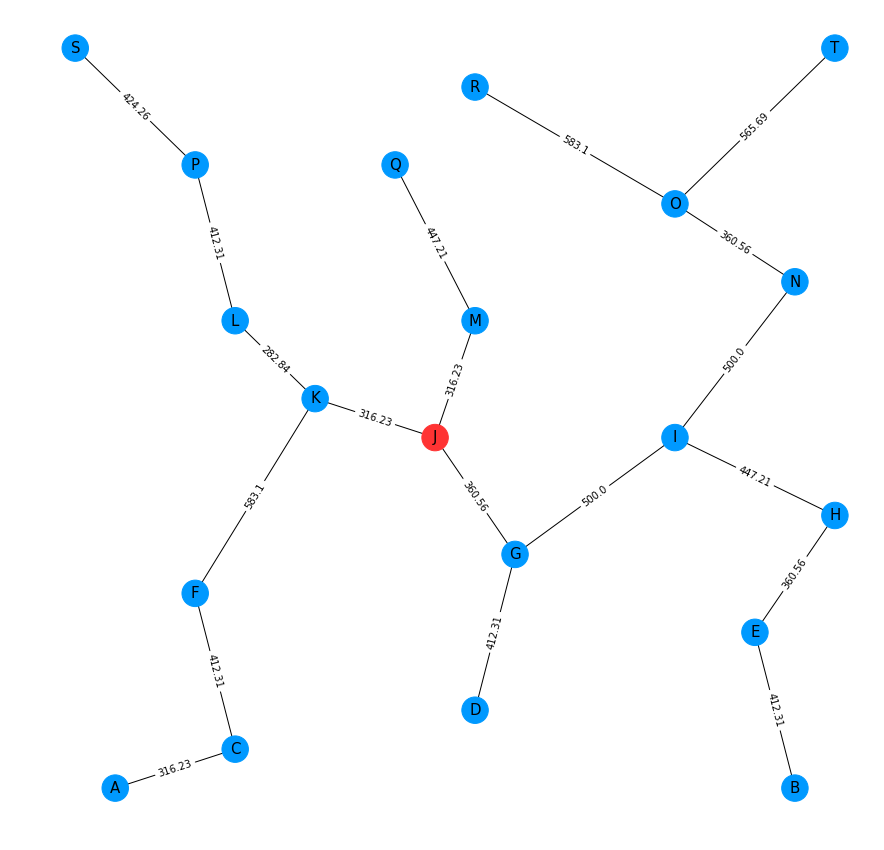

In [13]:
# Tamaño del Canvas
plt.figure(figsize = (15,15))

# Se dibujan los nodos
val_map = {'J': (1,0.2,0.2)}
values = [ val_map.get(node , (0, 0.6, 1)) for node in F.nodes()]
nx.draw_networkx_nodes(F, pos, node_size=700,node_color = values)

# Se dibujan las aristas

nx.draw_networkx_edges(F, pos, width=1)

# Se dibujan los nombres de los nodos y el peso de las aristas
nx.draw_networkx_labels(F, pos, font_size=15, font_family='sans-serif')
edge_labels = nx.get_edge_attributes(F,'weight')
nx.draw_networkx_edge_labels(F,pos, edge_labels = edge_labels)

plt.axis("off")  # Con esta linea ocultamos los ejes de coordenadas
plt.show()       # Mostramos todas las llaadas de dibujado realizadas anteriormente

*Matematicas Discretas - Universidad Industrial de Santander*

* *Brayan Esneider Monroy Chaparro*
* *Juan Jose*
* *Sebastian Leon*